In [1]:
!pip install tensorflow keras lime


     ---------------------------------------- 0.0/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/275.7 kB ? eta -:--:--
     ------------ ------------------------ 92.2/275.7 kB 476.3 kB/s eta 0:00:01
     ------------------------------------ - 266.2/275.7 kB 1.2 MB/s eta 0:00:01
     -------------------------------------- 275.7/275.7 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=091134afe49ef01128b4113a5ab7059b9de7fb5dd3fa9ce88ba8d5f95712c734
  Stored in directory: c:\users\surayia rahman\appdata\local\pip\cache\wheels\85\fa\a3\9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [9]:
!pip install --user tensorflow-datasets

  Obtaining dependency information for tensorflow-datasets from https://files.pythonhosted.org/packages/8f/50/52fa3d41d20c687d81f66338bc1b0e71a27a3390ecfa8f5bc212a10135e1/tensorflow_datasets-4.9.6-py3-none-any.whl.metadata
  Using cached tensorflow_datasets-4.9.6-py3-none-any.whl.metadata (9.5 kB)
  Obtaining dependency information for immutabledict from https://files.pythonhosted.org/packages/e2/13/3cf4ac5b3403f3456e645c4533883ef67b1bb0c72e56b79c707715f57a74/immutabledict-4.2.0-py3-none-any.whl.metadata
  Using cached immutabledict-4.2.0-py3-none-any.whl.metadata (3.4 kB)
  Using cached promise-2.3-py3-none-any.whl
  Obtaining dependency information for simple-parsing from https://files.pythonhosted.org/packages/b0/12/c657047c11a47e1c3e51bdc26bd6f2661a268fd0384bd8ed56b227530486/simple_parsing-0.1.5-py3-none-any.whl.metadata
  Using cached simple_parsing-0.1.5-py3-none-any.whl.metadata (7.7 kB)
  Obtaining dependency information for tensorflow-metadata from https://files.pythonhosted.o

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [10]:
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [12]:
# Load the Quick, Draw! dataset
(ds_train, ds_test), ds_info = tfds.load(
    'quickdraw_bitmap',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...: 100%
345/345 [15:32:31<00:00, 15739.59s/ url]
Dl Size...: 94%
35361/37537 [15:32:31<03:05, 11.72 MiB/s]


Processed Image Shape: (28, 28, 3, 1)
Processed Image: [[[[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]]


 ...


 [[[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]

  ...

  [[1.]
   [1.]
   [1.]]

  

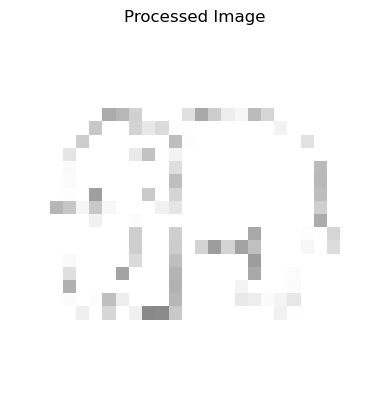

In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Preprocessing function
def preprocess(image, label=None):
    image = tf.image.resize(image, (28, 28))
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.expand_dims(image, axis=-1)
    return image, label

# Load the image from file
image_path = "C:/Users/Surayia Rahman/Downloads/tu-data/tu-train/elephant/5935.png"
image = tf.io.read_file(image_path)
image = tf.image.decode_png(image, channels=3)

# Since the function expects a label, we can pass a dummy label
dummy_label = tf.constant(0)

# Preprocess the image
processed_image, processed_label = preprocess(image, dummy_label)

# Print the results
print("Processed Image Shape:", processed_image.shape)
print("Processed Image:", processed_image.numpy())
print("Processed Label:", processed_label.numpy())

# Optionally, display the image to visually inspect it
plt.imshow(processed_image.numpy().squeeze(), cmap='gray')
plt.title("Processed Image")
plt.axis('off')
plt.show()

In [ ]:
# Apply preprocessing
ds_train = ds_train.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(32).prefetch(tf.data.experimental.AUTOTUNE)

In [16]:
# Define a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(ds_info.features['label'].num_classes, activation='softmax')
])

model.summary()



Model Summary:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2D)(None, 5, 5, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 345)               44505

In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(ds_train, epochs=5, validation_data=ds_test)

Epoch 1/5
1875/1875 [==============================] - 1080s 1080000ms/step - loss: 0.3562 - accuracy: 0.8905 - val_loss: 0.2764 - val_accuracy: 0.9182


In [19]:
# Load and preprocess the input image
img_path = "C:/Users/Surayia Rahman/Downloads/tu-data/tu-train/elephant/5935.png"
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

print("Shape of the image array:", img_array.shape)
print("Content of the image array:")
print(img_array)

Shape of the image array: 1, 28, 28, 1
Content of the image array: 0.67


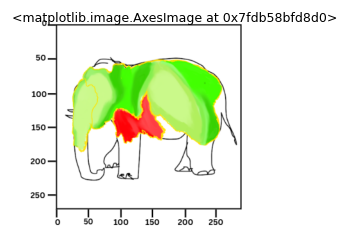

In [31]:
# Create a LIME image explainer
explainer = lime_image.LimeImageExplainer()

# Define a prediction function for the explainer
def predict_fn(images):
    return model.predict(images)

# Explain the prediction for the given image
explanation = explainer.explain_instance(img_array[0].astype('double'), predict_fn, top_labels=5, hide_color=0, num_samples=1000)

# Get the explanation for the top label
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=10, hide_rest=False)


In [ ]:
# Show the original image
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img_array[0].squeeze(), cmap='gray')

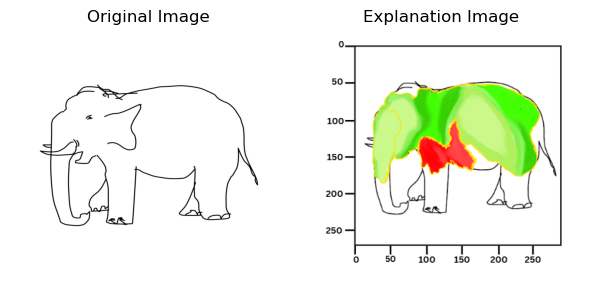

In [39]:
# Show the explanation
plt.subplot(1, 2, 2)
plt.title("LIME Explanation")
plt.imshow(mark_boundaries(temp, mask))
plt.show()

In [ ]:
# Additional Visualization: Perturbations
def perturb_and_show(image, explainer, predict_fn):
    explanations = explainer.explain_instance(image.astype('double'), predict_fn, top_labels=5, hide_color=0, num_samples=10)
    fig, axes = plt.subplots(1, 10, figsize=(20, 3))
    for i, perturb in enumerate(explanations.local_exp[explanations.top_labels[0]]):
        mask = np.zeros(image.shape[:2], dtype=bool)
        for segment in perturb:
            mask[explanations.segments == segment[0]] = True
        temp = image.copy()
        temp[~mask] = (0, 0, 0)
        axes[i].imshow(temp.squeeze(), cmap='gray')
        axes[i].axis('off')
    plt.show()

perturb_and_show(img_array[0], explainer, predict_fn)